**To prediction Crop yield**

**Importing Important Libraries**

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as mse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [4]:
z = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\crop yield prediction dataset\train.csv")
z

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,6,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,7,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,8,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,9,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,10,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


In [5]:
z.isnull().sum()

id                    0
Year                  0
State                 0
Crop_Type             0
Rainfall              0
Soil_Type             0
Irrigation_Area       0
Crop_Yield (kg/ha)    0
dtype: int64

In [6]:
z.shape

(55, 8)

In [7]:
z.size

440

In [8]:
z.describe()

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,55.00000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,2009.527273,473.881818,2082.207273,3079.418182
std,16.02082,6.394021,106.836760,1495.190498,1706.608372
min,1.00000,2000.000000,218.900000,1.200000,0.000000
25%,14.50000,2004.000000,391.900000,5.500000,985.500000
50%,28.00000,2009.000000,459.500000,2721.800000,3943.000000
75%,41.50000,2015.000000,561.400000,3393.250000,4305.500000
max,55.00000,2021.000000,662.800000,3515.200000,5188.000000


In [9]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55 non-null     int64  
 1   Year                55 non-null     int64  
 2   State               55 non-null     object 
 3   Crop_Type           55 non-null     object 
 4   Rainfall            55 non-null     float64
 5   Soil_Type           55 non-null     object 
 6   Irrigation_Area     55 non-null     float64
 7   Crop_Yield (kg/ha)  55 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [10]:
z["id"] = z["id"].astype(str)

**Data Analysis**

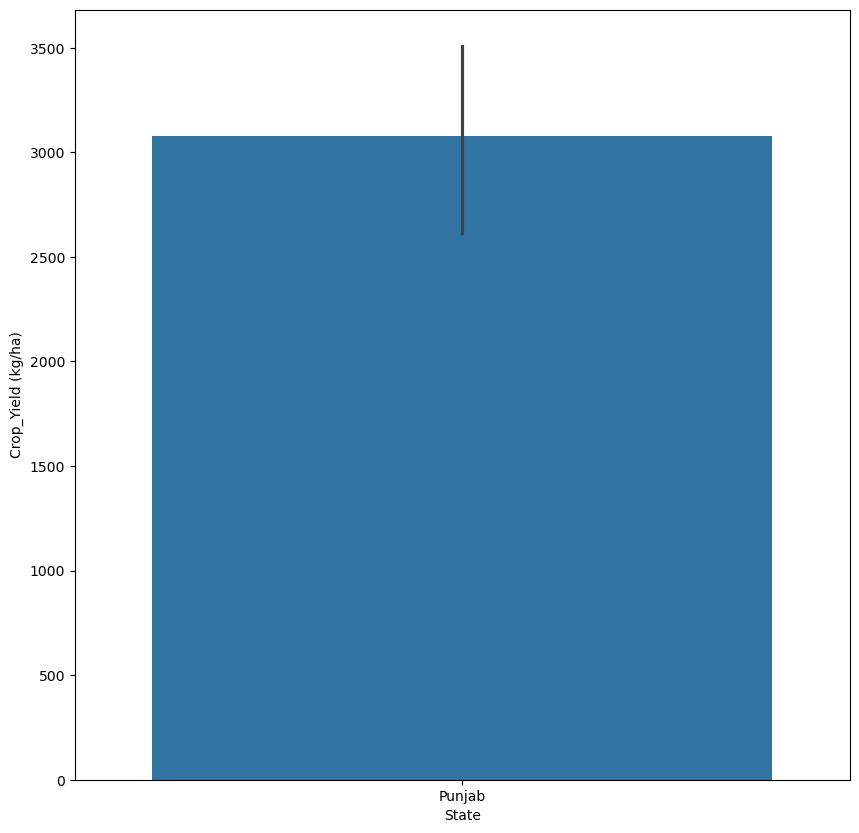

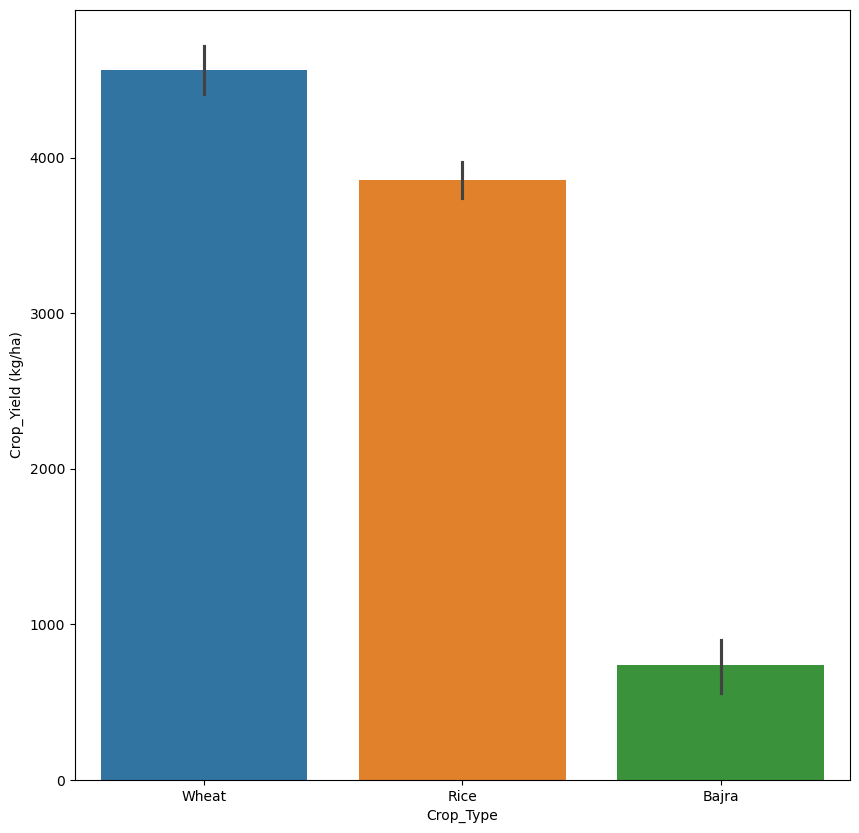

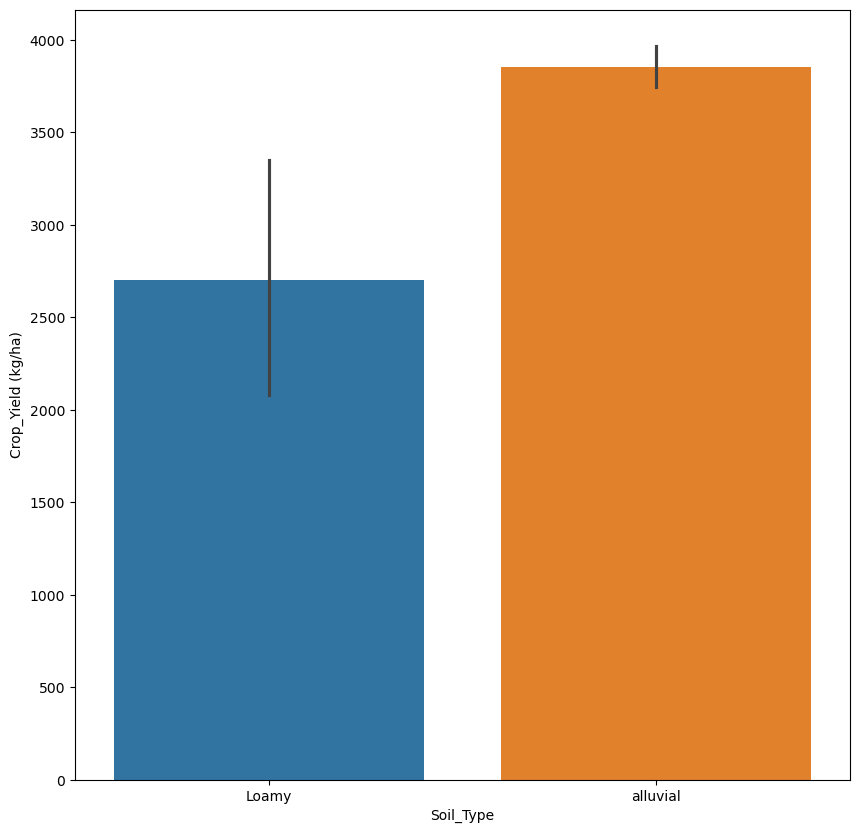

In [12]:
for i in z.columns:
    if(z[i].dtype == "object") and ( i != "id"):
        plt.figure(figsize = (10, 10))
        sns.barplot(x = z[i], y = z["Crop_Yield (kg/ha)"], data = z, hue = z[i])

<Axes: xlabel='Year', ylabel='Crop_Yield (kg/ha)'>

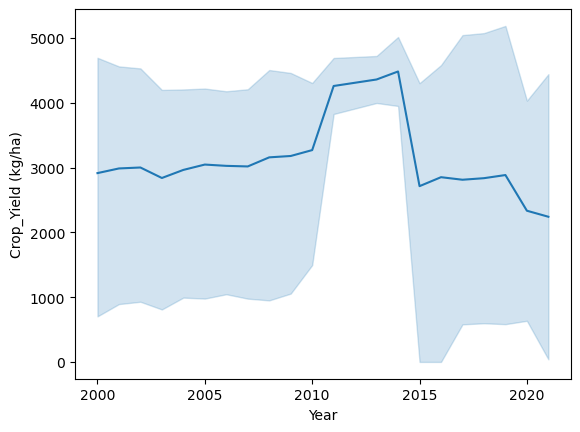

In [13]:
sns.lineplot(x = z["Year"], y = z["Crop_Yield (kg/ha)"], data = z)

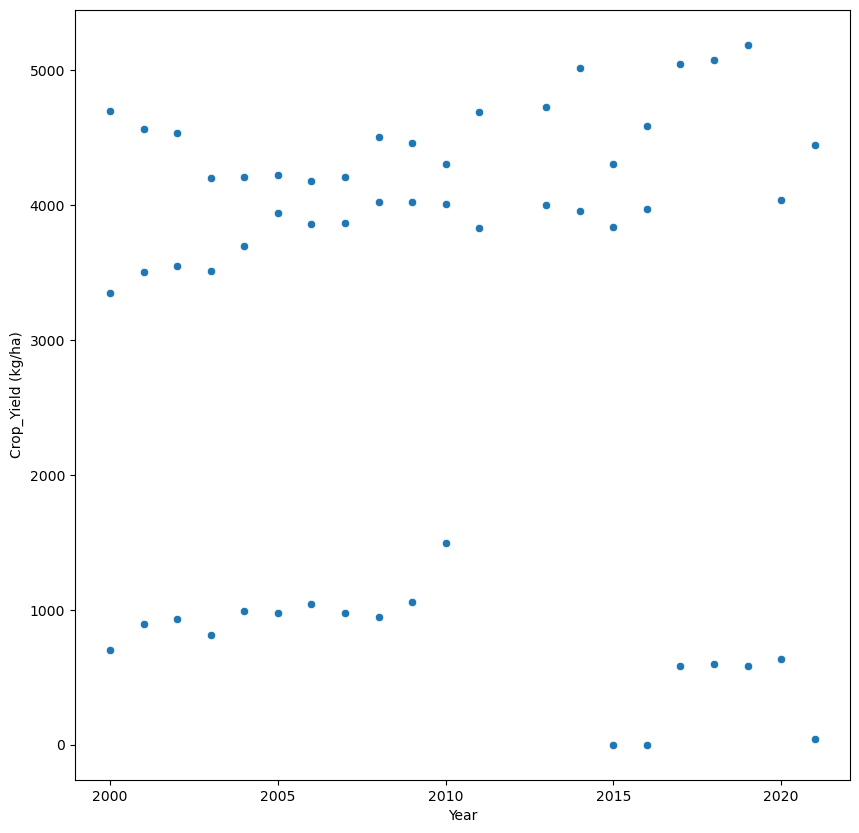

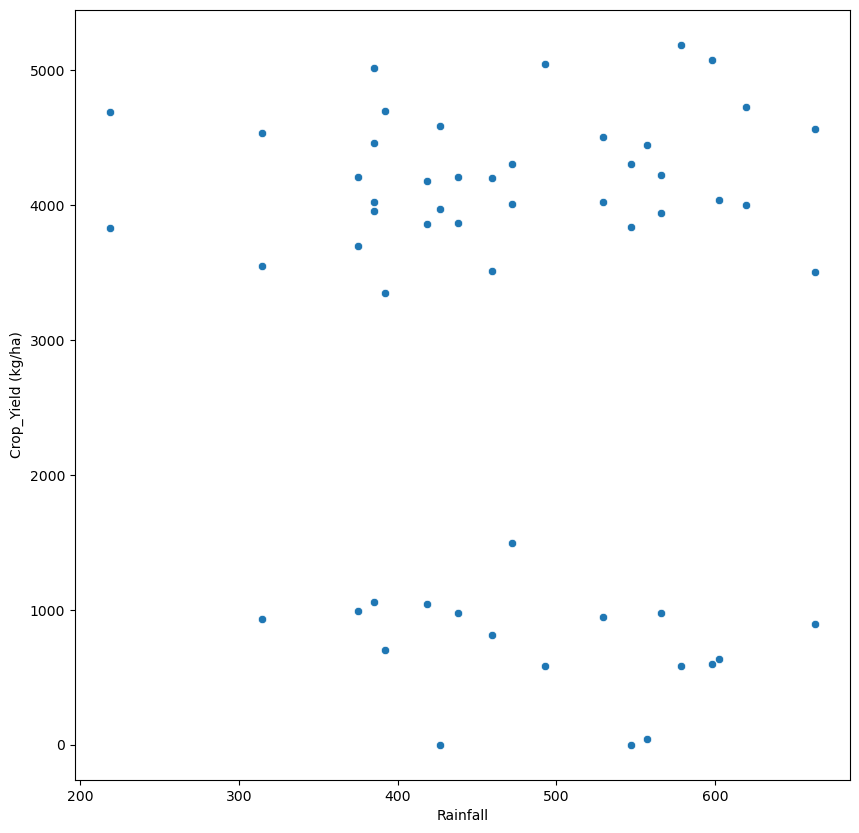

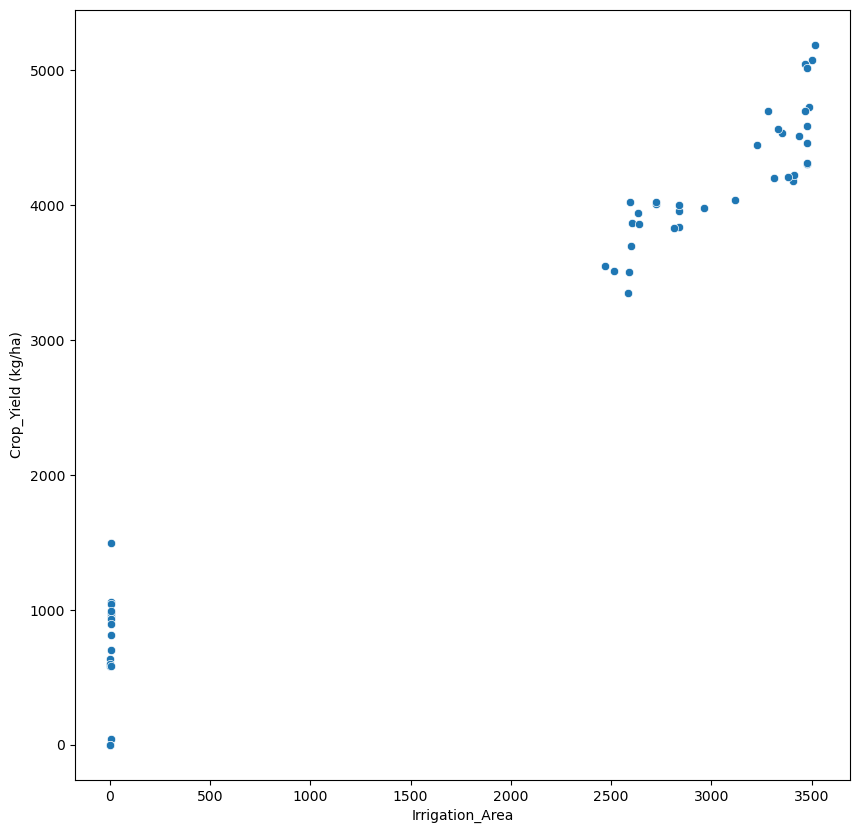

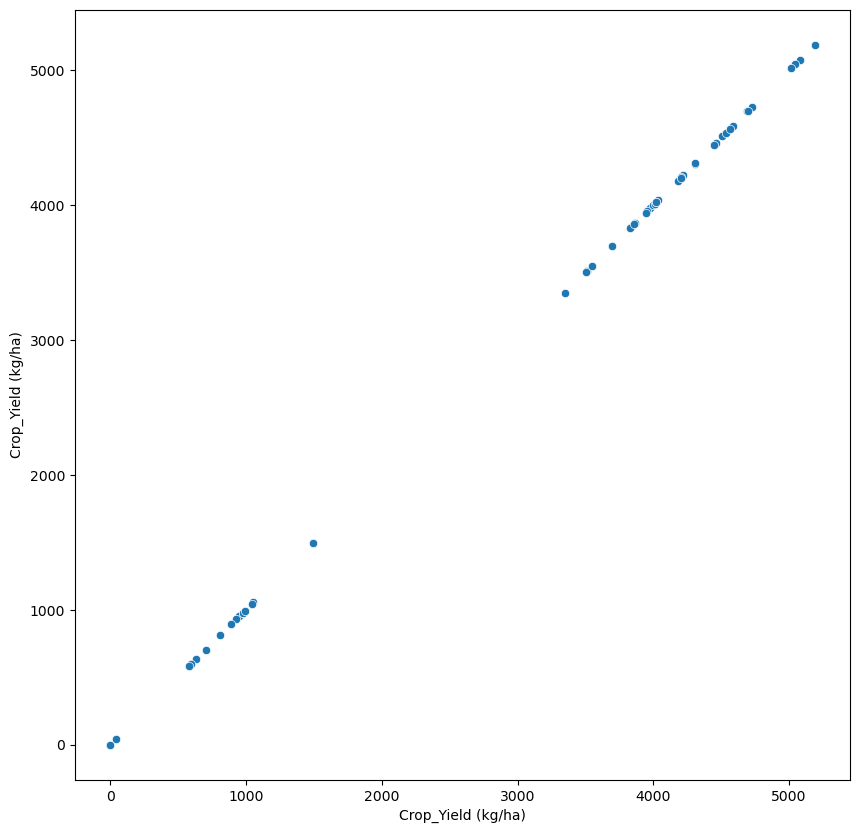

In [14]:
for i in z.columns:
    if(z[i].dtype != "object"):
        plt.figure(figsize = (10, 10))
        sns.scatterplot(x = z[i], y = z["Crop_Yield (kg/ha)"], data = z)

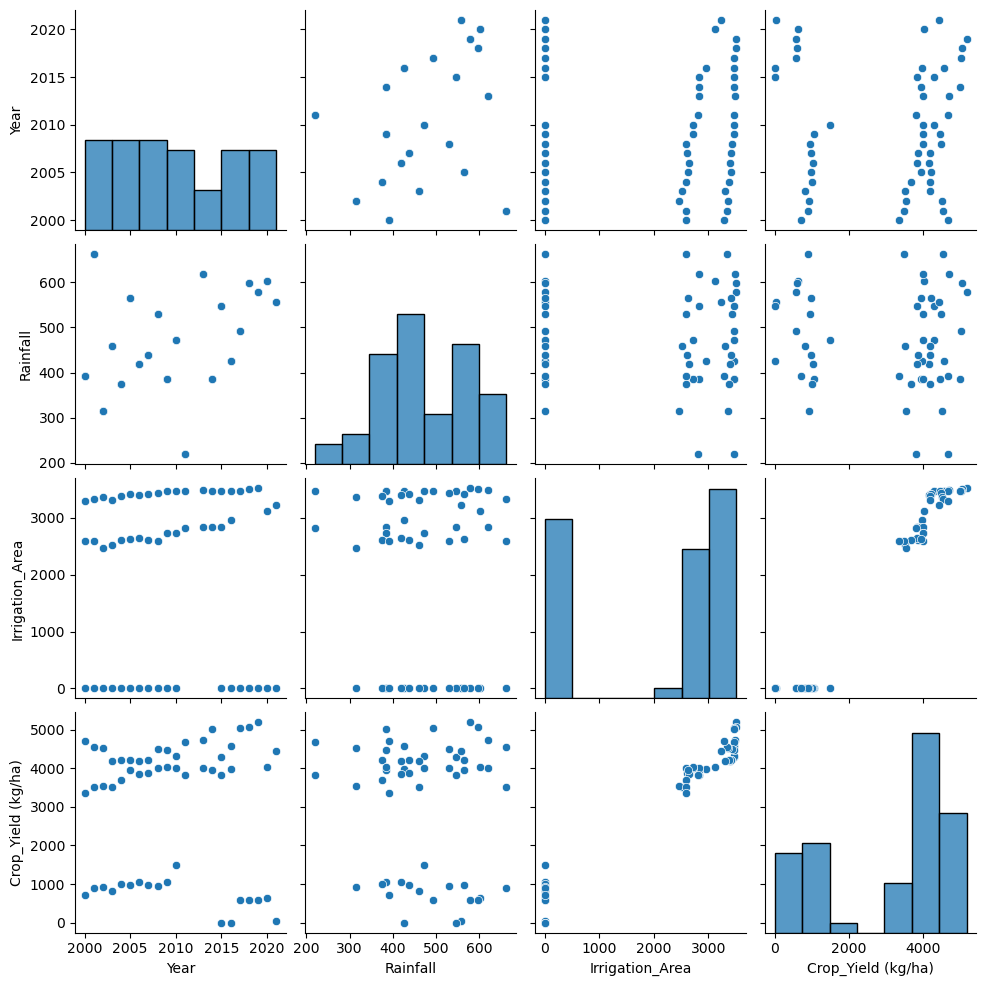

In [15]:
sns.pairplot(z)

In [16]:
z.columns

Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area', 'Crop_Yield (kg/ha)'],
      dtype='object')

In [17]:
pd.DataFrame(z.groupby(["State", "Crop_Type", "Soil_Type"])["Crop_Yield (kg/ha)"].sum())

Crop_Yield (kg/ha)
State  Crop_Type Soil_Type                    
Punjab Bajra     Loamy                   13263
       Rice      alluvial                69389
       Wheat     Loamy                   86716

In [18]:
b = z.copy()
for i in b.columns:
    if(b[i].dtype == "object"):
        b.drop([i], axis = 1, inplace = True)
b

,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
0,2019,578.6,3515.2,5188
1,2018,598.3,3499.3,5077
2,2017,493.0,3467.7,5046
3,2016,426.7,3474.6,4583
4,2015,546.9,3474.7,4304
5,2014,384.9,3474.7,5017
6,2013,619.7,3488.1,4724
7,2011,218.9,3466.9,4693
8,2010,472.1,3474.8,4307
9,2009,384.9,3474.8,4462


In [19]:
b.corr()

,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
Year,1.000000,0.304973,-0.001326,-0.026250
Rainfall,0.304973,1.000000,-0.085025,-0.092148
Irrigation_Area,-0.001326,-0.085025,1.000000,0.984287
Crop_Yield (kg/ha),-0.026250,-0.092148,0.984287,1.000000


<Axes: >

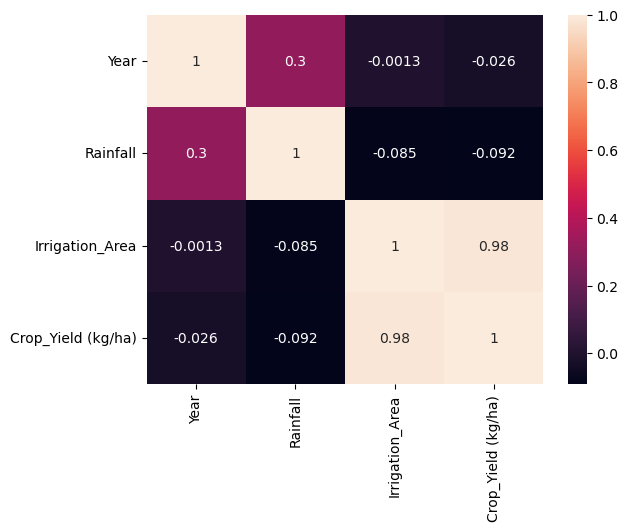

In [20]:
sns.heatmap(b.corr(), annot = True)

In [21]:
b.corr()["Crop_Yield (kg/ha)"].sort_values(ascending = False)

Crop_Yield (kg/ha)    1.000000
Irrigation_Area       0.984287
Year                 -0.026250
Rainfall             -0.092148
Name: Crop_Yield (kg/ha), dtype: float64

**Regression analysis**

<Axes: xlabel='Irrigation_Area', ylabel='Crop_Yield (kg/ha)'>

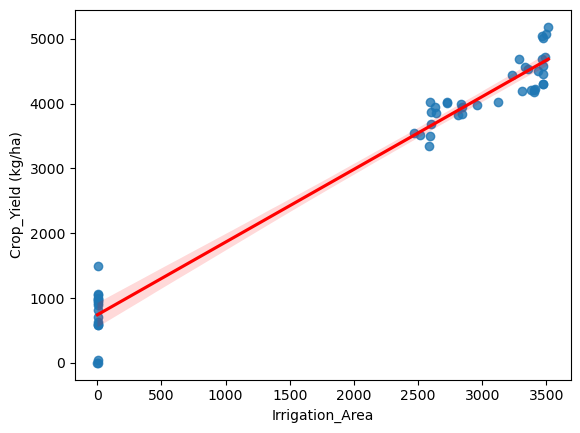

In [23]:
sns.regplot(x = z["Irrigation_Area"], y = z["Crop_Yield (kg/ha)"], data = z, line_kws = {"color" : "red"})

**Model selection**

In [25]:
X = b["Irrigation_Area"]
Y = b["Crop_Yield (kg/ha)"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

**Reshaping x_train**

In [28]:
x_train = np.array(x_train).reshape(-1, 1)

**Reshaping y_train**

In [30]:
y_train = np.array(y_train).reshape(-1, 1)

**Training model using train dataset**

In [32]:
n = LinearRegression()
n.fit(x_train, y_train)

LinearRegression()

**Evaluation of Training dataset**

In [34]:
y_predict_train = n.predict(x_train)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)

In [35]:
round(r2_train, 2)*100

97.0

In [36]:
mse_train = mse(y_true = y_train, y_pred = y_predict_train)

In [37]:
rmse_train = np.sqrt(mse_train)

In [38]:
rmse_train

294.06160727273607

**Reshaping x_test**

In [40]:
x_test = np.array(x_test).reshape(-1, 1)

**Reshaping y_test**

In [42]:
y_test = np.array(y_test).reshape(-1, 1)

**Evaluation of Testing dataset**

In [44]:
y_predict_test = n.predict(x_test)
r2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

In [45]:
round(r2_test, 2)*100

97.0

In [46]:
mse_test = mse(y_true = y_test, y_pred = y_predict_test)

In [47]:
rmse_test = np.sqrt(mse_test)
rmse_test

320.86173720697604

**Residual analysis for training dataset**

In [49]:
res_train = y_train - y_predict_train

In [50]:
res_train

array([[-202.3891355 ],
       [-781.07631834],
       [-106.82293029],
       [  24.3288216 ],
       [ 136.99624114],
       [ 121.16413507],
       [ 141.68780015],
       [ -29.77273187],
       [ 167.17325878],
       [ 130.88312969],
       [ -44.81163671],
       [-289.13345846],
       [ 469.71807177],
       [-276.36917647],
       [-324.89757696],
       [ 265.31418937],
       [ 710.64163876],
       [ -46.13847648],
       [ 241.93949669],
       [-118.4785779 ],
       [  84.22535659],
       [-259.69645021],
       [ 192.87582875],
       [ 108.09463161],
       [-780.31050833],
       [-271.62584665],
       [ 270.64163876],
       [ 473.28892363],
       [  62.6929756 ],
       [ 190.91396047],
       [ -33.10945026],
       [ 260.31343447],
       [-201.93544427],
       [  67.86152352],
       [-198.07631834],
       [   2.74022496],
       [ 114.62733353],
       [-273.4785779 ]])

<Axes: ylabel='Density'>

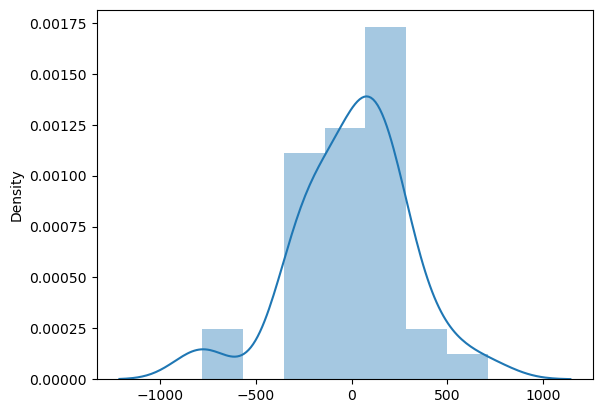

In [51]:
sns.distplot(res_train, kde = True)

**Residual analysis for testing dataset**

In [53]:
res_test = y_test - y_predict_test

In [54]:
res_test

array([[ 404.09844254],
       [ 284.22846915],
       [  71.00273673],
       [-296.19500698],
       [-185.06093121],
       [ 193.40744877],
       [ 563.32324442],
       [ 128.97103192],
       [ 253.31418937],
       [ -81.03015695],
       [ 436.63082353],
       [-157.0094874 ],
       [ 206.12540587],
       [ 323.93114609],
       [-146.18571977],
       [ -21.20946357],
       [-743.26434694]])

<Axes: ylabel='Density'>

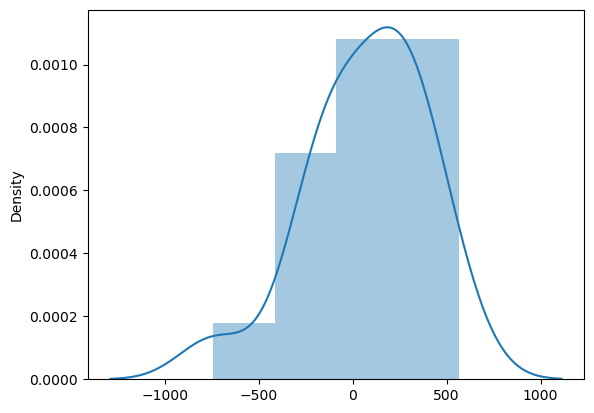

In [55]:
sns.distplot(res_test, kde = True)

**Recommendations**

Crop yield prediction models play a pivotal role in modern agriculture, bridging the gap between data analysis and actionable insights. By leveraging comprehensive datasets and advanced machine learning techniques, stakeholders can drive sustainable growth, improve resource utilization, and secure food supplies for the future. This analysis underscores the transformative potential of data-driven approaches in addressing global agricultural challenges.